In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#creating a new column family in the  as dataset by adding SibSp  col and parch column
df['Family'] = df['SibSp'] + df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [4]:
#Ticket--> as it is just a random number, we can skip this column from our analysis

In [5]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [6]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
#Based on categories , we will analyze which category  people were more likely to survive
##low,mid,mid-high,high
df['Fare_Category'] = pd.cut(df.Fare,bins = [0,7.9,14.45,31.00,512], 
                             labels = ['Low','Mid','Mid-High', 'High'])


In [8]:
df[['Fare','Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


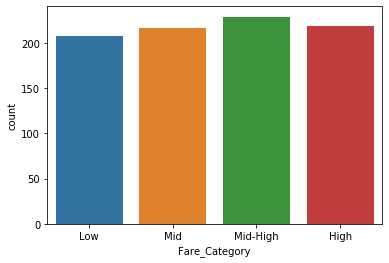

In [9]:
#visualize the Fare category
#countplot give you entire count of a category-->categories of survived and deceased 
sns.countplot(x = 'Fare_Category',data = df)

Text(0.5, 1.0, 'Survived based on Fare Category')

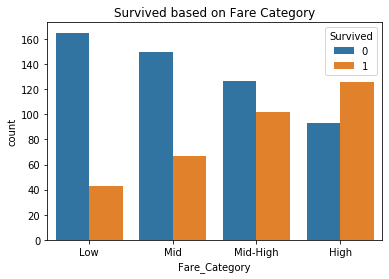

In [10]:
#plt.figure(figsize=(8,8))
sns.countplot(x = 'Fare_Category',hue = 'Survived',data = df).\
              set_title('Survived based on Fare Category')

In [11]:
#Embarked: Port--> from which the passenger had boarded the ship
df.Embarked.value_counts()#out of passengers,which part has taken more %

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

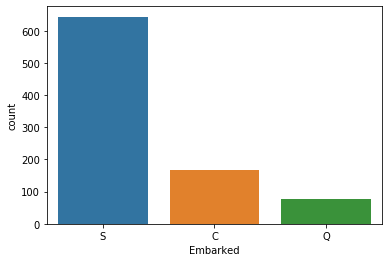

In [13]:
##visualizing the port column
sns.countplot(x = 'Embarked', data = df)

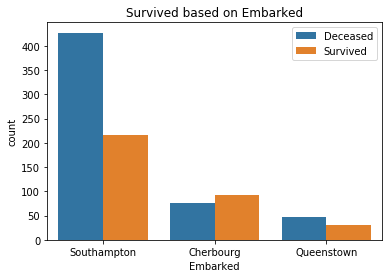

In [14]:
##visualizing the port column
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
p.set_title('Survived based on Embarked')
p.legend(labels=['Deceased','Survived'])

In [15]:
##Imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [16]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [17]:
##cabin-->77% missing values,we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [18]:
df.Cabin.isnull().sum()

0

In [19]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [21]:
#Median --->sorting in the order(middle value)NaN in the age column should be substituted with median of age
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [22]:
df.Embarked.mode()

0    S
dtype: object

In [23]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
#Imputing the Embarked Column-->mode imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [25]:
#Imputing the Fare category column
df.Fare_Category.isnull().sum()

18

In [26]:
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

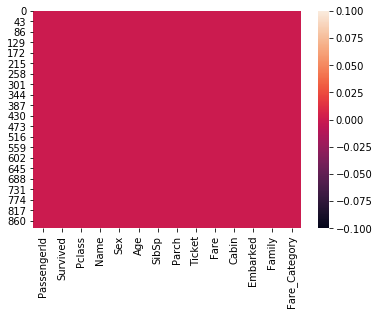

In [28]:
sns.heatmap(df.isnull())

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [30]:
df['Age-Range']= pd.cut(df.Age,[0,10,20,30,40,50,60,70,80])
df[['Age', 'Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [32]:
dummy_set = pd.get_dummies(df.Fare_Category, drop_first=True) #n columns, we need to include upto n-1 dummy columns


In [33]:
df = pd.concat([df,dummy_set],axis=1)

In [34]:
##Encoding of Categorical variables/Columns
df = pd.concat([df,pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
                pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
                pd.get_dummies(df.Fare_Category,prefix='Fare',drop_first=True),
                pd.get_dummies(df['Age-Range'],drop_first=True)],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,0,0,1,0,0,0,0


Label Encoder-->0,1,2,3,4,..(how many categories are present in the col,that many numbers we will get )
OneHotEncoder-->it will create dummy col for each and every category

In [36]:
#Encoding the sex column
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,1,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,1,0,0,0,0,1,0,0,0,0


In [37]:
#pd.set_options('display max_columns',None)
df.columns

Index([  'PassengerId',      'Survived',        'Pclass',          'Name',
                 'Sex',           'Age',         'SibSp',         'Parch',
              'Ticket',          'Fare',
       ...
            'Fare_Mid', 'Fare_Mid-High',     'Fare_High',        (10, 20],
              (20, 30],        (30, 40],        (40, 50],        (50, 60],
              (60, 70],        (70, 80]],
      dtype='object', length=177)

In [39]:
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_Category','Cabin','Age-Range'],axis =1,inplace=True)


In [40]:
df.shape


(891, 166)

In [42]:
df.head()

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,3,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,3,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [41]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Family      int64
Mid         uint8
            ...  
(30, 40]    uint8
(40, 50]    uint8
(50, 60]    uint8
(60, 70]    uint8
(70, 80]    uint8
Length: 166, dtype: object

In [ ]:
#StandardScaler-- not required for this(DistanceBased Algorithm)

In [44]:
##separating the input and output Data
X = df.drop('Survived',axis=1)
X.shape

(891, 165)

In [45]:
 df.iloc[:,1]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [46]:
#output column
y = df.iloc[:,0]
y.shape

(891,)

In [ ]:
## input and output into training data and testing data
Training--> wew will be training the model on training data
Testing--> check the performance of the model 

In [ ]:
from sklearn.model_selection import train_test_split
K_train,X_test,y_train,y_test =train_test_split(X,y)